# Run  dem_2_streams

#### This notebook builds the initial stream network and subbasins. This script uses the file model_points_scripts.shp.

In [1]:
%matplotlib inline
import sys, os
import matplotlib.pyplot as plt
import arcpy
import geopandas
import matplotlib.image as mpimg
import ConfigParser
from matplotlib import cm
from arcpy import env
python_exe = sys.executable

In [2]:
# Set folder locations
arc_gsflow_folder=r"..\scripts"
config_file_folder=r"..\examples\sagehen"

#### GsflowArcpy uses a configuration file to set variables required by the scripts. Below the configuration file template is read, and default values are changed and written to the configuration file (".INI") read by GsflowArcpy.

In [3]:
# Load GsflowArcpy configuration file
Config = ConfigParser.ConfigParser()
Config.read("..\examples\sagehen\sagehen_parameters_orig.ini")

['..\\examples\\sagehen\\sagehen_parameters_orig.ini']

#### Values set below define the resolution of the stream network.

In [4]:
# Set problem specific variable values for scripts

# Subbasin numbering will be defined using value in "zone" field
# Value in "type" field must be: OUTLET, SUBBASIN, or SWALE
model_points_path = r"..\examples\sagehen\shapefiles\model_points_scripts.shp"
model_points_zone_field = "SUBNUM"
model_points_type_field = "TYPE"

# Cells with flow accumulations >= threshold will be designated as stream cells
flow_acc_threshold = 100
# All 1st order streams with a length below threshold will be removed
flow_length_threshold = 3
calc_flow_dir_points_flag = True

In [5]:
# Write out modified values to configuration file
cfgfile = open("..\examples\sagehen\sagehen_parameters.ini",'w')

Config.set('INPUTS','model_points_path',model_points_path)
Config.set('INPUTS','model_points_zone_field',model_points_zone_field)
Config.set('INPUTS','model_points_type_field',model_points_type_field)

Config.set('INPUTS','flow_acc_threshold',flow_acc_threshold)
Config.set('INPUTS','flow_length_threshold',flow_length_threshold)
Config.set('INPUTS','calc_flow_dir_points_flag',calc_flow_dir_points_flag)
Config.write(cfgfile)
cfgfile.close()

#### Run the GsflowArcpy script dem_2_streams script.

In [6]:
# Set and run dem_2_streams script
script = r"dem_2_streams.py"
argument = r" -i ..\examples\sagehen\sagehen_parameters.ini"
cmd=python_exe + " " + os.path.join(arc_gsflow_folder,script)
cmd = cmd + argument
os.system(cmd)

0

#### The dem_2_streams script generates the linework for the stream network. The USGS National Hydrography dataset is used as a guide to set a desired stream network resolution for a GSFLOW model; however, the NHD network is not used explicitly to define the stream network. 

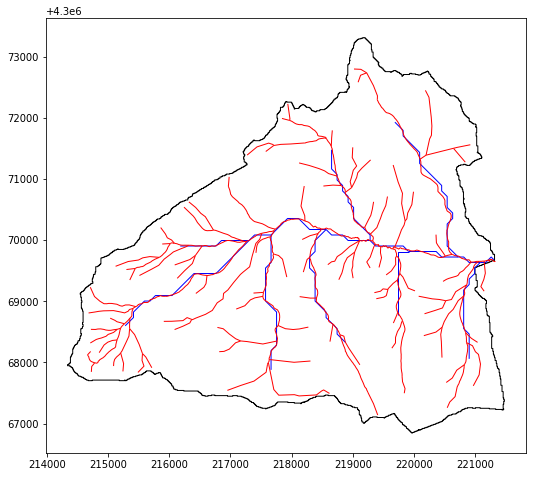

In [7]:
fig, ax = plt.subplots(figsize=(20,8))
ax.set_aspect('equal')
fn1=r"..\examples\sagehen\shapefiles\watershed_proj.shp"
fn2=r"..\examples\sagehen\hru_params\flow_rasters\streams.shp"
fn3=r"..\examples\sagehen\nhd\NHDFlowline_proj.shp"
boundary=geopandas.read_file(fn1)
streams=geopandas.read_file(fn2)
nhd=geopandas.read_file(fn3)
streams.plot(ax=ax,color='none', edgecolor='blue', linewidth=1.0)
boundary.plot(ax=ax,color='none', edgecolor='black', linewidth=1.0)
nhd.plot(ax=ax,color='none', edgecolor='red', linewidth=1.0)
plt.show()

## Class Exercises:
#### How does the stream network generated above (blue lines) compare to the NHD network (red lines)? What values provide a reasonable resolution of the network?

#### Change the flow accumulation and stream length threshold values, and re-run dem_2_streams.py to observe how these thresholds effect the level of detail of the flowlines.

#### Observe the inital subbasin in ArcMap (subbasin.img in the 'flow_rasters' folder). Only a single subbasin was created because the model points shapefile only has a single OUTLET point. 

### Create a subbasin
#### Open model_points_scripts.shp and streams.shp in ArcMap. Start an editing session by selecting 'Editor' > 'Start Editing' and select the model points shapefile to edit.

#### Click on the 'Create Features' icon on the Editor toolbar, and select the model points file in the Create Features window

#### Select 'Point' under Construction Tools (within the Create Features window) and place a point on a stream somewhere that will represent a subbasin outlet.

#### In the Attribute Table for the model points shapefile, make the type = SUBBASIN and SUBNUM = 2

#### Stop editing and save edits. Re-run dem_2_streams.py and observe the new subbasin.img once finished.


